In [19]:
from matplotlib import pyplot as plt
import platform, os, sys
import numpy as np
from tabulate import tabulate
from pprint import pprint

if 'Windows' in platform.system():
    sys.path.append(r'C:\Users\slab\Documents\Code')
    sys.path.append(r'D:\BEMPP_shared\Modules')
    import interpolate_slow
else:
    sys.path.append(r'/mnt/s/_Data/160513 - EonHe M016v5/modules')
    from BEM import interpolate_slow
    
from Common import common, kfit
from TrapAnalysis import trap_analysis

%matplotlib inline
%config InlineBackend.figure_format='retina'

For the file below the potential was evaluated at 0.74 $\mu$m above the surface. 

In [2]:
# Important coordinates define where we take the slice.
# For the trap constriction:
r_trap = (-1.5, 0)
# For the resonator 
r_resonator = (7.5, 0)

# Depth of the channel
helium_thickness= 0.74E-3 # mm

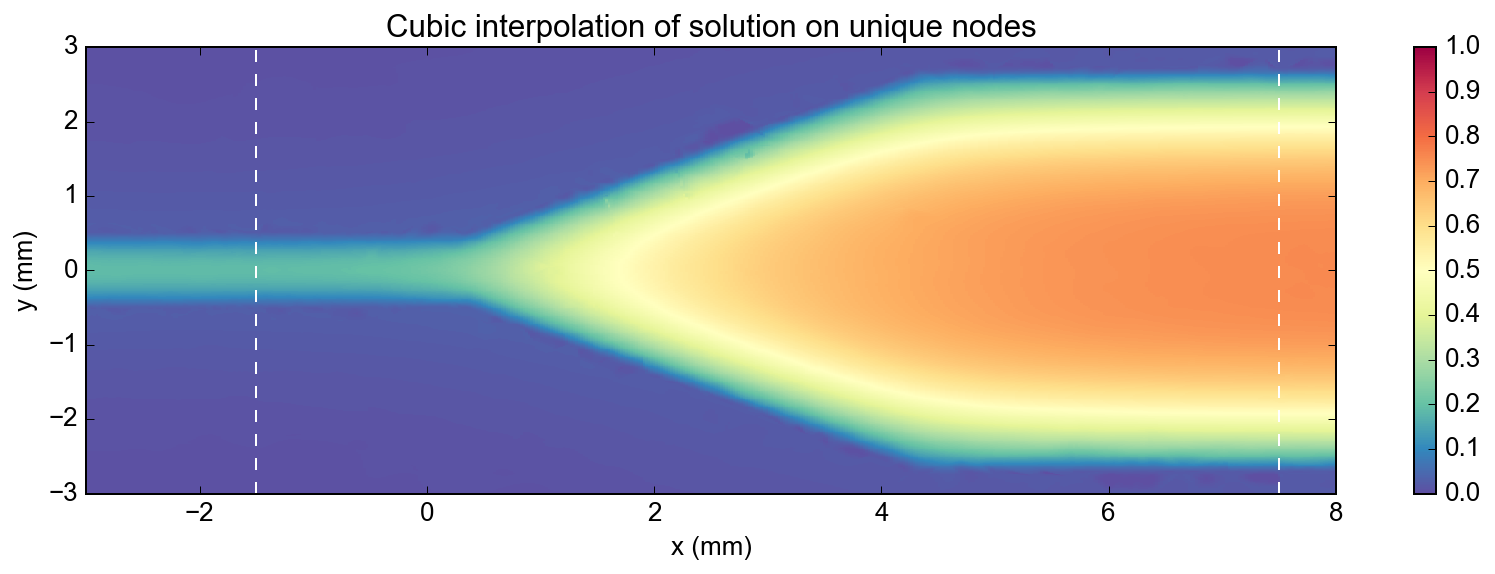

In [3]:
# Evaluate all files in the range
xeval=np.linspace(-3, 8, 501)
yeval = np.linspace(-3, 3, 501)

datafile = r"S:\_Data\160513 - EonHe M016v5\data\simulation\Maxwell\160608 - Greater trap area\Greater Trap Area xy - Resonator.dsp"

plt.figure(figsize=(14.,4.))
common.configure_axes(13)
elements, nodes, elem_solution, bounding_box = trap_analysis.load_dsp(os.path.join(datafile))
xdata, ydata, Udata = interpolate_slow.prepare_for_interpolation(elements, nodes, elem_solution)
xcenter = np.mean(bounding_box[0:2])
ycenter = np.mean(bounding_box[2:4])
xdata -= xcenter
ydata -= ycenter
xinterp, yinterp, Uinterp = interpolate_slow.plot_BC(xdata, ydata, Udata, xeval=xeval, yeval=yeval, clim=(0, 1.0), 
                                                     plot_axes='xy', cmap=plt.cm.Spectral_r, plot_mesh=False)

plt.vlines(r_trap[0], -3.0, 3.0, linestyles="--", color="white")
plt.vlines(r_resonator[0], -3.0, 3.0, linestyles="--", color="white")

Value at center is 0.191 V


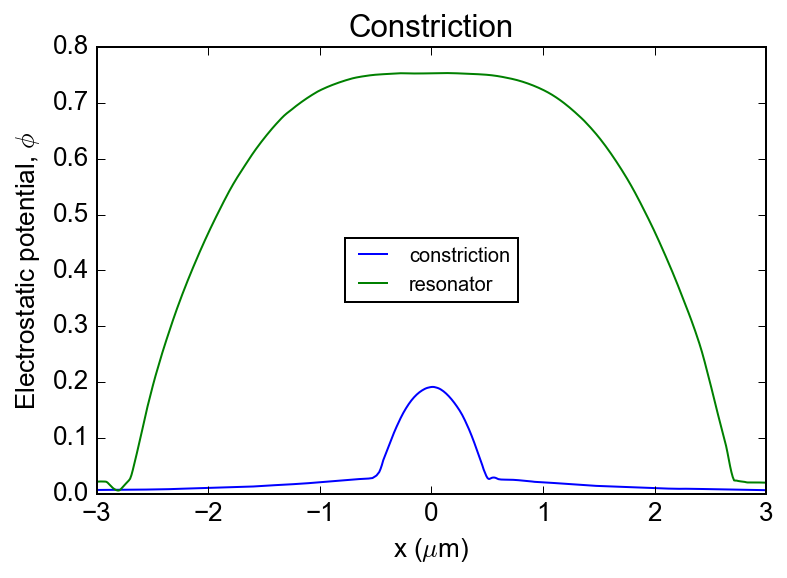

In [4]:
idx = common.find_nearest(xeval, r_trap[0])
idx2 = common.find_nearest(xeval, r_resonator[0])
Vconstriction = Uinterp[:, idx]
Vresonator = Uinterp[:, idx2]
xconstriction = yeval

plt.figure()
common.configure_axes(13)
plt.plot(xconstriction, Vconstriction, label='constriction')
plt.plot(xconstriction, Vresonator, label='resonator')
plt.legend(loc=0, prop={"size":10})
plt.xlabel("x ($\mu$m)")
plt.ylabel("Electrostatic potential, $\phi$")
plt.title("Constriction")
plt.xlim(np.min(xconstriction), np.max(xconstriction))

ctr_idx = common.find_nearest(yeval, 0)
print "Value at center is %.3f V"%(Uinterp[ctr_idx, idx])

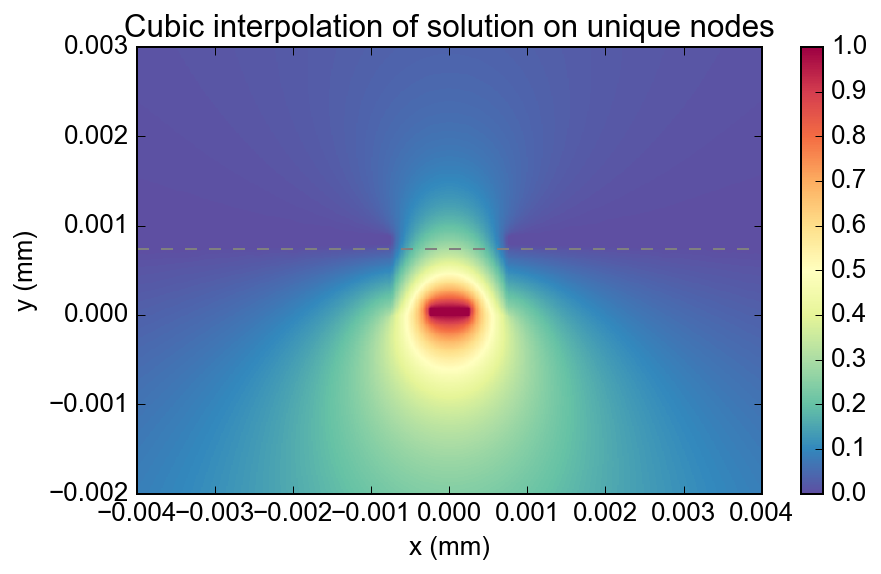

In [5]:
# Evaluate all files in the range
xeval=np.linspace(-4E-3, 4E-3, 501)
yeval = np.linspace(-2E-3, 3E-3, 501)

datafile = "..\\Maxwell\\M016v5 Where did it go wrong\\DC Bias Constriction.dsp"

plt.figure(figsize=(7.,4.))
common.configure_axes(13)
elements, nodes, elem_solution, bounding_box = trap_analysis.load_dsp(os.path.join(datafile))
xdata, ydata, Udata = interpolate_slow.prepare_for_interpolation(elements, nodes, elem_solution)
xcenter = np.mean(bounding_box[0:2])
ycenter = np.mean(bounding_box[2:4])
xdata -= xcenter
ydata -= ycenter
xinterp, yinterp, Uinterp = interpolate_slow.plot_BC(xdata, ydata, Udata, xeval=xeval, yeval=yeval, clim=(0, 1.0), 
                                                     plot_axes='xy', cmap=plt.cm.Spectral_r, plot_mesh=False)

plt.hlines(helium_thickness, -2.0, 2.0, linestyles="--", color="gray")

Value at center is 0.304 V


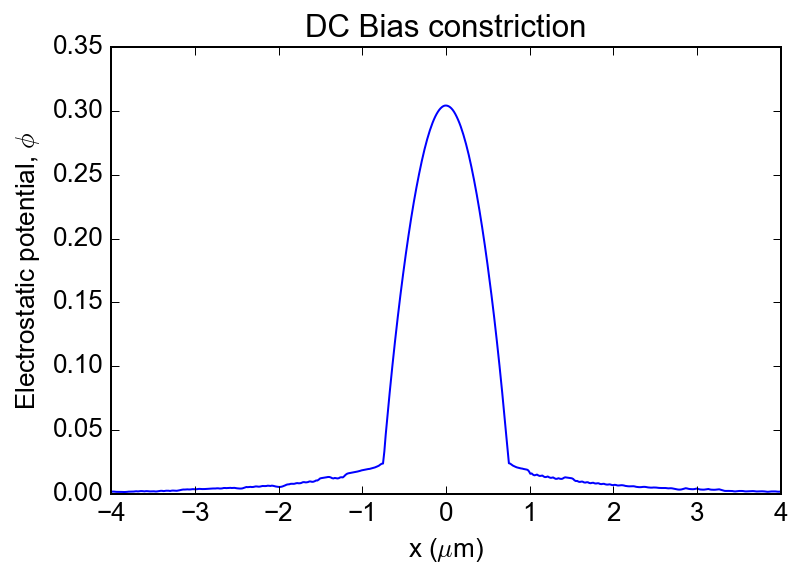

In [6]:
idx = common.find_nearest(yeval, helium_thickness)
Vdcbias = Uinterp[idx, :]
xdcbias = xeval

plt.figure()
common.configure_axes(13)
plt.plot(xdcbias*1E3, Vdcbias)
plt.xlabel("x ($\mu$m)")
plt.ylabel("Electrostatic potential, $\phi$")
plt.title("DC Bias constriction")

ctr_idx = common.find_nearest(xeval, 0)
print "Value at center is %.3f V"%(Uinterp[idx,ctr_idx])

# Compare 

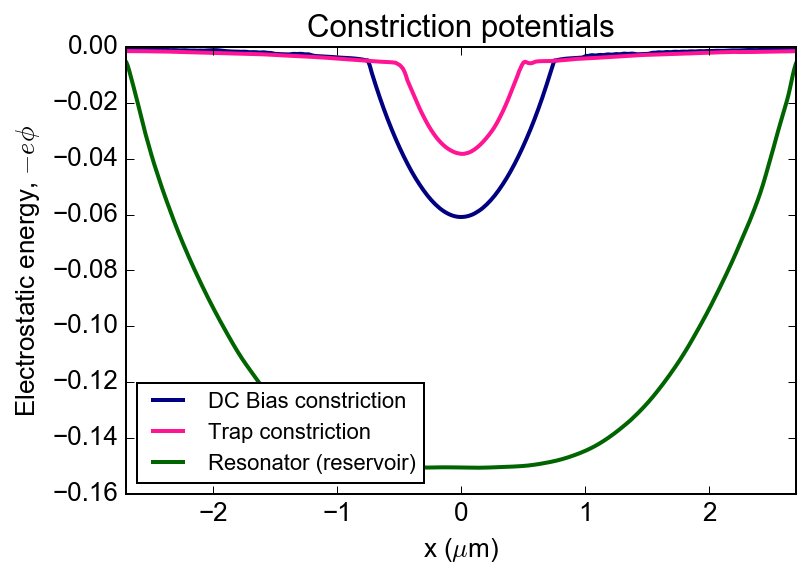

In [7]:
idx = common.find_nearest(yeval, 0.74E-3)
Vdcbias = Uinterp[idx, :]
xdcbias = xeval*1E3

voltage = 0.2

plt.figure()
common.configure_axes(13)
plt.plot(xdcbias, -Vdcbias * voltage, lw=2.0, color='navy', label='DC Bias constriction')
plt.plot(xconstriction, -Vconstriction * voltage, lw=2.0, color='deeppink', label='Trap constriction')
plt.plot(xconstriction, -Vresonator * voltage, lw=2.0, color='darkgreen', label='Resonator (reservoir)')
plt.xlabel("x ($\mu$m)")
plt.ylabel("Electrostatic energy, $-e\phi$")
plt.title("Constriction potentials")
plt.xlim(-2.7, 2.7)

plt.legend(loc=3, prop={'size':11})

#common.save_figure(plt.gcf(), save_path=r"..\\Maxwell\\M016v5 Where did it go wrong")

# Calculate electron density

The electron density is 7.08e+12 m^(-2)
Fit function: y = a0 + a1*x**2 + a2*x**4 + ...
===========  ================  =================
Parameter         Value               Std
===========  ================  =================
a0           -0.152136096815   9.51916259948e-05
a1           0.00703082752311  9.52108223348e-05
a2           0.00181021731233  1.70051003464e-05
===========  ================  =================
The width of the ensemble is 4.63 um
The linear electron density along the resonator is 2.440e+07 m^(-1)
This corresponds to 7.32e+04 electrons on the resonator


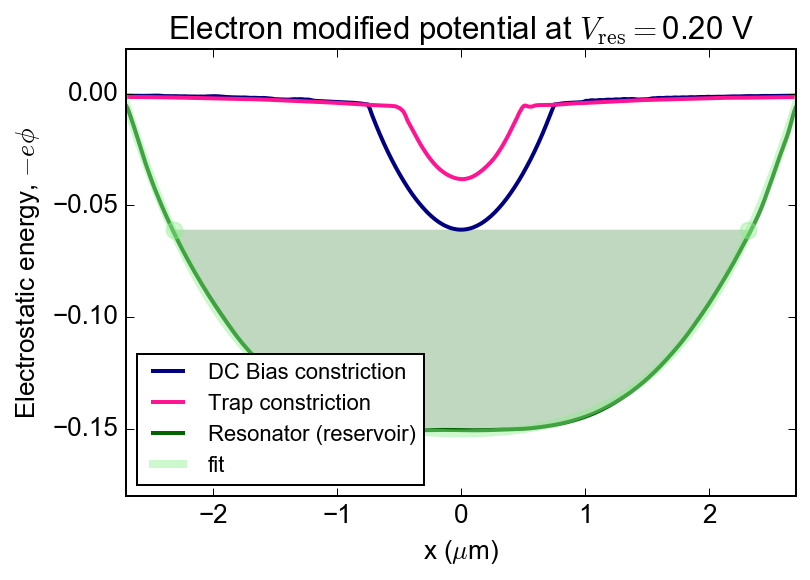

In [47]:
Vresonator_minimum = Vresonator[common.find_nearest(xconstriction, r_resonator[1])]
Vdcbias_minimum = Vdcbias[common.find_nearest(xdcbias, 0)]

epsilon_He = 1.056
epsilon_0 = 8.85E-12
phi_e = voltage*(Vresonator_minimum - Vdcbias_minimum)
n_s = phi_e * epsilon_He * epsilon_0 / (1.602E-19 * helium_thickness*1e-3)

print "The electron density is %.2e m^(-2)"%n_s

plt.figure()
common.configure_axes(13)
plt.plot(xdcbias, -Vdcbias * voltage, lw=2.0, color='navy', label='DC Bias constriction')
plt.plot(xconstriction, -Vconstriction * voltage, lw=2.0, color='deeppink', label='Trap constriction')
plt.plot(xconstriction, -Vresonator * voltage, lw=2.0, color='darkgreen', label='Resonator (reservoir)')
plt.xlabel("x ($\mu$m)")
plt.ylabel("Electrostatic energy, $-e\phi$")
plt.title("Electron modified potential at $V_\mathrm{res} = $%.2f V"%voltage)
plt.xlim(-2.7, 2.7)

plt.fill_between(xconstriction, -Vresonator * voltage, y2=-Vdcbias_minimum*voltage, 
                 where= -Vresonator < -Vdcbias_minimum, alpha=0.25, facecolor="darkgreen", edgecolor='none')

fr, ferr = kfit.fit_poly(xconstriction, -Vresonator * voltage, fitparams=(0, -5, -5), mode='even', domain=(-2.5,2.5))
plt.plot(xconstriction, kfit.polyfunc_even(xconstriction, *fr), color='lightgreen', lw=4.0, label='fit', alpha=0.45)
plt.legend(loc=3, prop={'size':11})


a = fr[0]
b = fr[1]
c = fr[2]

wc = np.sqrt(2*b/c*(-1 + np.sqrt(1-4*c/b**2 * -phi_e)))
print "The width of the ensemble is %.2f um"%wc

plt.plot([-wc/2., wc/2.], [-voltage*Vdcbias_minimum, -voltage*Vdcbias_minimum], 'o', **common.plot_opt('lightgreen'))

linear_electron_density = epsilon_He*epsilon_0/(1.602E-19 * helium_thickness * 1E-3) * (wc*1E-6)**3/4. * ((2*b*1E12)/3. + (c*1E24)/5. * (wc*1E-6)**2)

print "The linear electron density along the resonator is %.3e m^(-1)"%(linear_electron_density)
print "This corresponds to %.2e electrons on the resonator"%(linear_electron_density*3E-3)

plt.ylim(-0.18, 0.02)

common.save_figure(plt.gcf(), save_path=r"..\\Maxwell\\M016v5 Where did it go wrong")